In [157]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import pandas as pd
import re
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import norm
import itertools
from math import factorial


import warnings
warnings.filterwarnings("ignore")

# Задача 1:

*Положим, что X - с.в., отражающая номер такси, которое приехало второй раз.*

*Тогда:* $$ P(X = k) = 1 \cdot \frac{(n-1)}{n} \cdot \frac{(n-2)}{n} \cdot  \ ...  \ \cdot \frac{n-k+1}{n}  \cdot \frac{k}{n} $$

*При этом по принципу Дирихле имеем, что: $$ k \le n \ + \ 1 $$*

**Пункт А:**

* Теперь запишем функцию правдоподобия в соответствии с функцией вероятности, полученной выше и тем, что k = 10: 

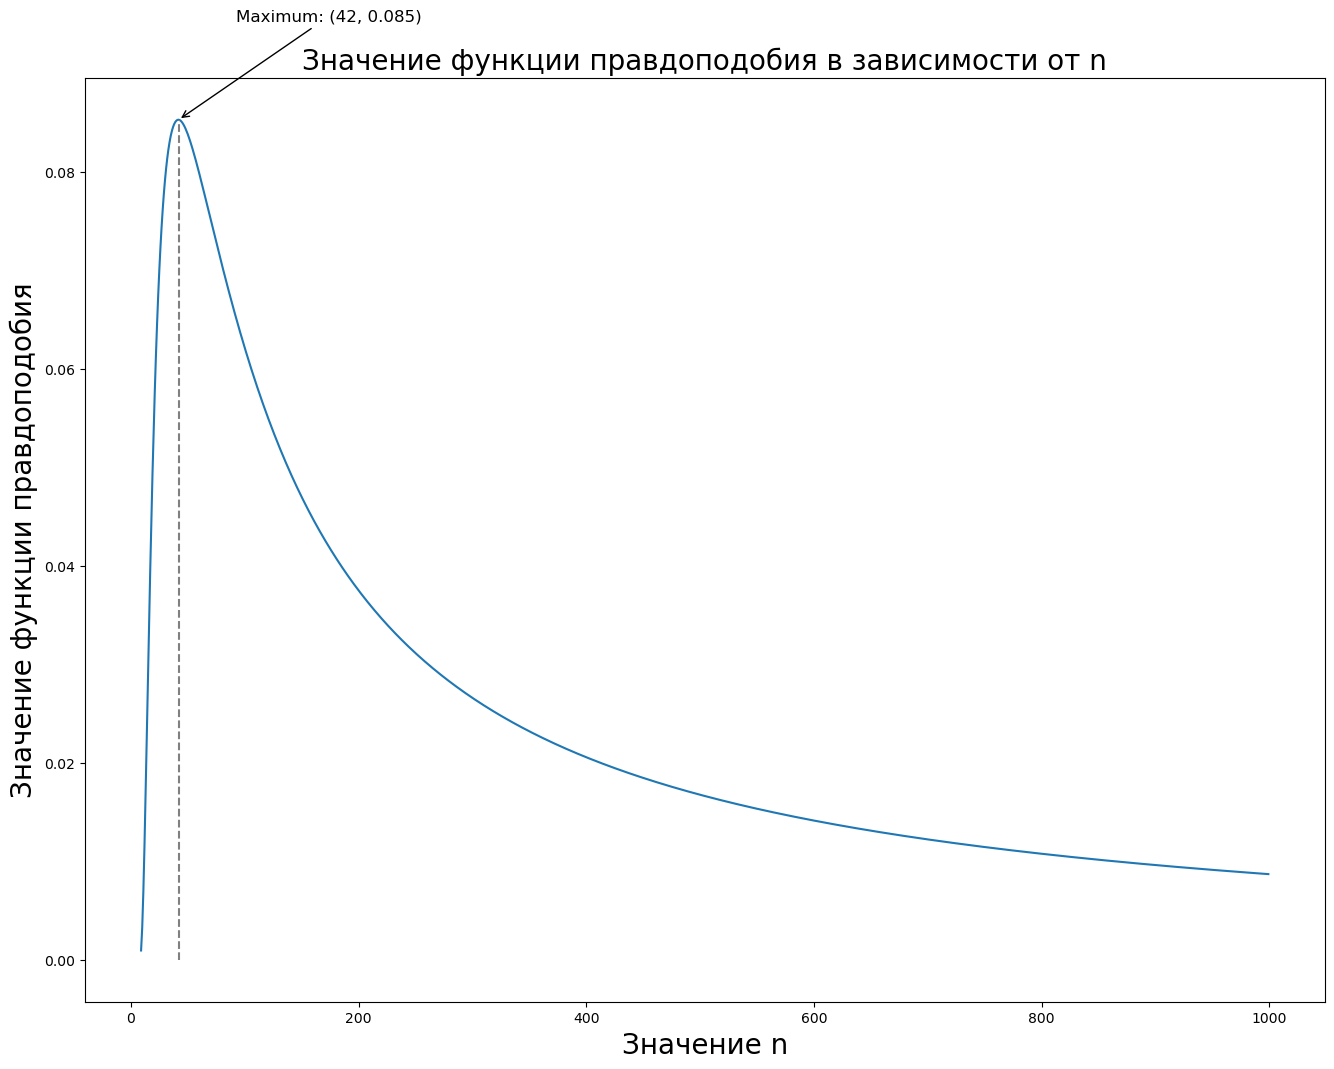

Точка максимума функции правдоподобия при k = 10: 42


In [130]:
def Likelihood(n):
    a = 1
    for x in range(2,11):
        a = a*(n-x+2)/n
    return a*(9)/n


l = [Likelihood(n) for n in range(9, 1000)]
opred = np.arange(9, 1000)



plt.figure(figsize=(16,12))
plt.xlabel('Значение n', fontsize=20)
plt.ylabel('Значение функции правдоподобия', fontsize=20)
plt.title('Значение функции правдоподобия в зависимости от n', fontsize=20)
plt.plot(opred, l)


max_index = np.argmax(l)
max_n = opred[max_index]
max_likelihood = l[max_index]



plt.plot([max_n, max_n], [0, max_likelihood], color='gray', linestyle='--')
plt.plot([max_n, 42], [max_likelihood, max_likelihood], color='gray', linestyle='--')
plt.annotate(f'Maximum: ({max_n}, {max_likelihood:.3f})', xy=(max_n, max_likelihood),
             xytext=(max_n + 50, max_likelihood + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.show()

print(f'Точка максимума функции правдоподобия при k = 10: {max_n}')


**Пункт Б:**

* Теперь зададим функцию, которая имитирует эксперимент: мы выбираем таксиситов из общего числа, а потом достаем номер первого повторившегося.

In [131]:
def f(n):
    taxers = np.arange(1,n+1)
    real = np.random.choice(taxers, len(taxers))
    seen_elements = set()
    for element in real:
        if element in seen_elements:
            duplicate = element
            break
        seen_elements.add(element)
    return np.where(real == duplicate)[0][1] + 1

*Зададим функцию вероятности в общем виде в зависимости от k и n, а затем функцию, считающую матожидание в зависимости от n:*

In [132]:
def P(k, n):
    a = 1
    for x in range(2,k+1):
        a = a*(n-x+2)/n
    return a*(k-1)/n

def E(n):
    s = 0
    for k in range(2, n+2):
        s += k*P(k, n)
    return(s)  

*Изобразим график матожидания в зависимости от n и отметим оценку ММ:*

100%|██████████████████████████████████████████████████████████████████████████████| 1498/1498 [07:10<00:00,  3.48it/s]


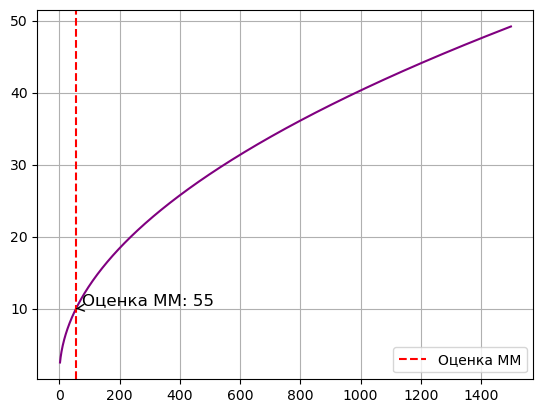

Оценка ММ: 55.


In [140]:
n_gen = np.arange(2, 1500)
E_n = np.array([E(n) for n in tqdm.tqdm(n_gen)])

plt.plot(n_gen, E_n, color='purple')
plt.grid()

min_index = np.argmin(np.abs(E_n - 10))
min_n = n_gen[min_index]
min_E = E_n[min_index]

plt.axvline(x=min_n, color='red', linestyle='--', label='Оценка ММ')
plt.annotate(f'Оценка ММ: {min_n}', xy=(min_n, min_E),
             xytext=(min_n + 20, min_E + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.legend()

plt.show()

print(f'Оценка ММ: {min_n}.')


**Пункт В:**

 *Нагенерим с.в. для $10^4$ симуляций:*

In [148]:
np.random.seed(19)
k_s = np.array([f(100) for _ in range(10**4)])   

In [149]:
np.unique(k_s)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 41, 42, 48], dtype=int64)

**Считаем оцекни ML:**

In [155]:
ML_est = []
for k in tqdm.tqdm(k_s):
    n_ki = np.arange(k-1, 1500)
    j = [P(k, n) for n in range(k-1,1500)]
    ML_est.append(n_ki[j == np.max(j)][0])
    
    

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:45<00:00, 94.53it/s]


*Смотрим на распределение этих оценок:* 

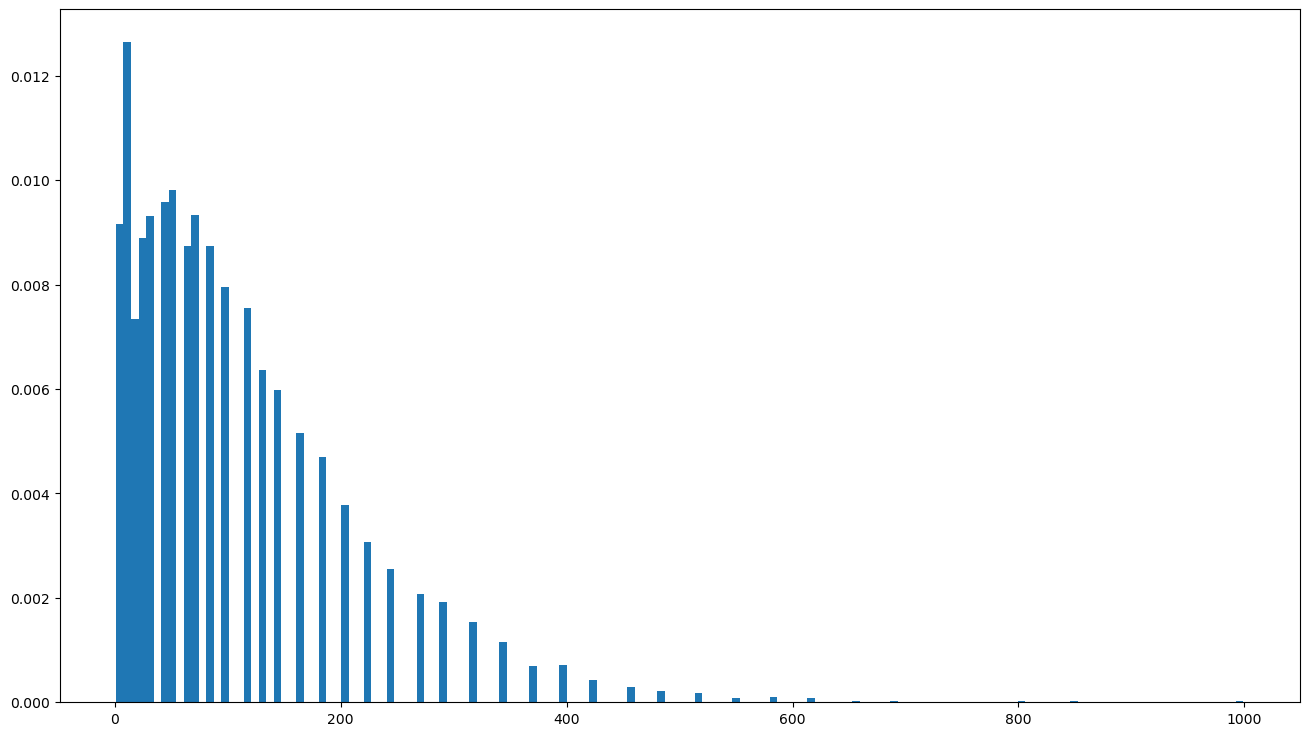

In [150]:
plt.figure(figsize = (16,9))
plt.hist(ML_est, bins = 150, density = True)
plt.show()

**Считаем оценки MM:**

In [182]:
MM_est = []
for k in k_s:
    n_hat = n_gen[abs(E_n - k) == np.min(abs(E_n - k))][0]
    MM_est.append(n_hat)

*Смотрим распределение:*

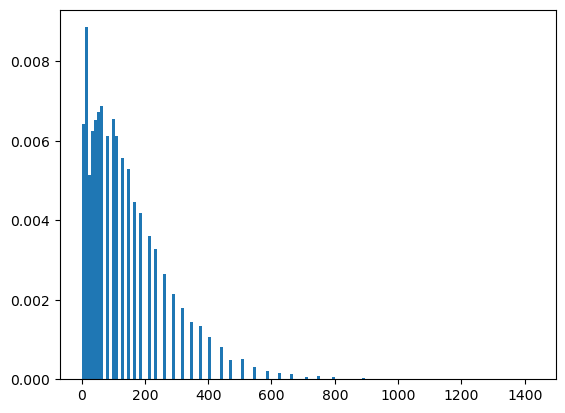

In [183]:
plt.hist(MM_est, bins = 150, density = True)
plt.show()

*Считаем дисперсию, MSE, смещение:*

In [153]:
bias_mm = abs(100 - np.mean(MM_est))
bias_ml = abs(100 - np.mean(ML_est))

mse_mm = np.sum(((np.array(MM_est) - 100)**2)/10**4)
mse_ml = np.sum(((np.array(ML_est) - 100)**2)/10**4)

var_mm = np.sum(((np.array(MM_est) - np.mean(MM_est))**2)/10**4)
var_ml = np.sum(((np.array(ML_est) - np.mean(ML_est))**2)/10**4)

In [154]:
result = pd.DataFrame({'Оценка': ('ML', 'MM'),'Смещение': (bias_ml, bias_mm), 'Дисперсия': (var_ml, var_mm), 'MSE': (mse_ml, mse_mm)})
result.set_index('Оценка')

,Смещение,Дисперсия,MSE
Оценка,,,
ML,5.6903,8327.081786,8359.4613
MM,23.0730,13832.437871,14364.8012


# Задача 2:

*А теперь будем считать, что $k$ - с.в., которая определяет число уникальных имён таксистов, встреченных туристом.*

*А как строить функцию вероятности?*

*Пусть есть n = 2 уникальных имен, такси вызываются m = 3 раза, турист встречает k = 2 уникальных таксистов.
Пусть имена - Асхаб и Сардор(А и С).*

*Тогда если просто перебрать варианты такого события, получим, что есть следующие комбинации имён встреченных таксистов:*

$\space$



<center>АСС АСА ААС САА САС ССА</center>


*Всего вариантов* $2^3$ $\Rightarrow$ $$P  = \frac{6}{8} = 0.75 $$

Пробуем формализовать: $$P = 1\cdot \frac{1}{n} \cdot \frac{n-1}{n} + 1\cdot \frac{n-1}{n} \cdot \frac{2}{n} = 1 \cdot \frac{1}{2} \cdot \frac{1}{2} + 1 \cdot \frac{1}{2} = \frac{1}{2} + \frac{1}{4} = 0.75$$

*Отсюда можно выводить закономерность о том, что в вероятности будет присутствовать множитель, как в прошлом номере:*

$$ 1 \cdot \frac{(n-1)}{n} \cdot \frac{(n-2)}{n} \cdot  \ ...  \ \cdot \frac{n-k+1}{n} $$

*Но помимо этого у нас присутствуют повторяющиеся имена, поэтому будут присутствовать множители вида $ \frac{l}{n} $ где $l$ это количество уже встреченных таксистов, в зависимости от того, где мы встречаем повторение. Таких множителей будет $m - k$, при этом в числителе куммулятивное произведение из последовательности чисел от 1 до k, в том числе с повторениями. Таких множителей будет m - k. Отмечу, что в данной конструкции можно вынести за скобки множитель $ 1 \cdot \frac{(n-1)}{n} \cdot \frac{(n-2)}{n} \cdot  \ ...  \ \cdot \frac{n-k+1}{n} $, и тогда в скобках для всех возможных случаев с конкретным $k$ будет присутствовать количество слагаемых, которое равно $C_{m-1}^{m-k}$, потому что мы как бы рассаживаем таксистов места, на которых происходят повторы по всем доступным для них, то есть по $m - 1$. Поэтому для записи формулы вероятности для каждого конкретного случая придется доставать произведения чисел от 1 до к с повторениями и длины m - k, что в общем виде записать довольно проблематично. Поэтому тут поможет itertools.*





**Пункт А**

Записываем на основе выведенной закономерности функцию вероятности:

In [4]:
def P_yand(k, n, m: int = 10):
    prob = 1
    s = 0
    for i in range(1, k):
        prob *= ((n-i)/n)
    combinations = itertools.combinations_with_replacement(np.arange(1, k+1), m - k)
    for el in combinations:
        prob_repeat = 1
        for i in range(m-k):
            prob_repeat *= el[i]
        s += prob_repeat
    prob *= (s/(n**(m - k)))
    return prob 

Максимизируем функцию правдоподобия при k = 6 и достаем оценку n:

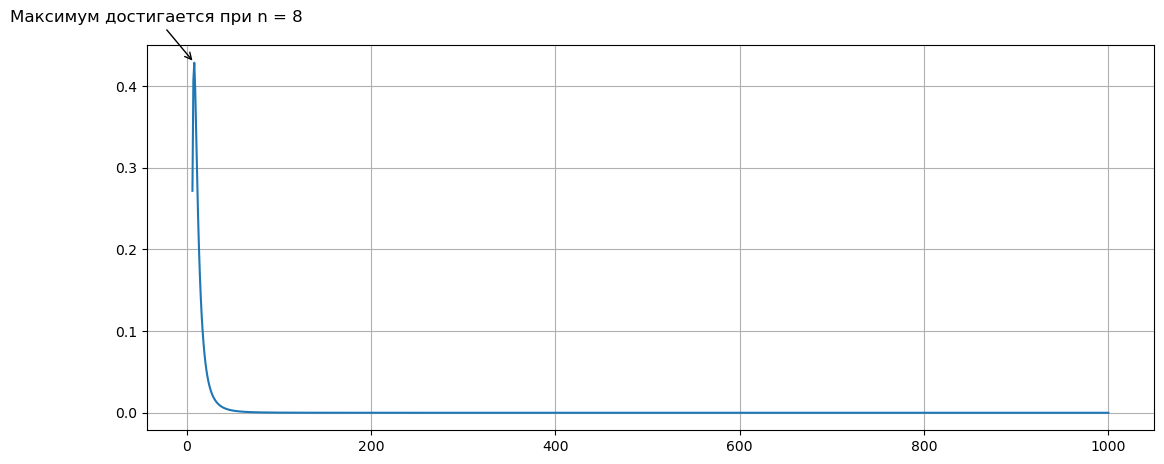

 ML-оценка: 8


In [156]:
plt.figure(figsize=(13, 5))

obl_opred = np.arange(6, 1001)
probs = [P_yand(6, n) for n in range(6, 1001)]

plt.plot(obl_opred, probs)
plt.grid()

max_index = np.argmax(probs)
max_n = obl_opred[max_index]
max_prob = probs[max_index]


plt.annotate(f'Максимум достигается при n = {max_n}', xy=(max_n, max_prob),
             xytext=(max_n - 200, max_prob + 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)



plt.show()

print(f' ML-оценка: {max_n}')


**Пункт Б**

Тут задаем функцию, подсчитывающую матожидание в зависимости от n:

In [62]:
def E_names(n):
    sum_of_p = 0
    for k in range(1, 11):
        sum_of_p += k*P_yand(k,n, m = 10)
    return sum_of_p

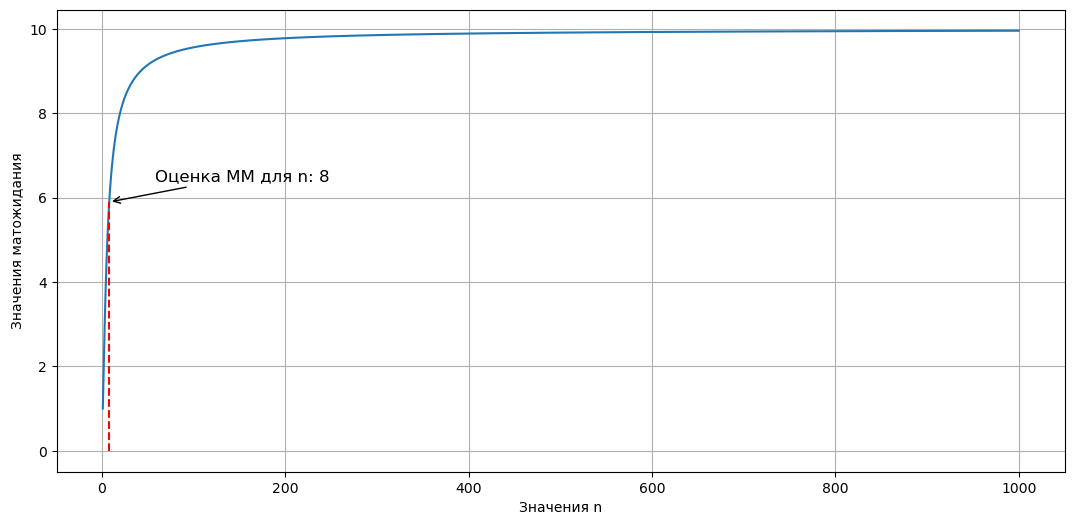

Оценка общего числа таксистов при помощи MM: 8.


In [75]:
plt.figure(figsize=(13, 6))
n_vals = np.arange(1, 1001)
E_all = np.array([E_names(i) for i in range(1, 1001)])

plt.plot(np.arange(1, 1001), E_all)
plt.grid()

min_index = np.argmin(np.abs(E_all - 6))
min_n = n_vals[min_index]
min_E = E_all[min_index]


plt.annotate(f'Оценка MM для n: {min_n}', xy=(min_n, min_E),
             xytext=(min_n + 50, min_E + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.plot([min_n, min_n], [0, min_E], color='red', linestyle='--')



plt.xlabel('Значения n')
plt.ylabel('Значения матожидания')
plt.show()

print(f'Оценка общего числа таксистов при помощи MM: {min_n}.')


**Пункт В:**

In [9]:
# - Функция для генерации эксперимента:

def g(n, m):
    n_names = np.arange(1, n+1)
    sample_after_10_calls = np.random.choice(n_names, size = m)
    return np.unique(sample_after_10_calls).shape[0]
    

In [10]:
# - Генерим 10^4 случайных величин:

np.random.seed(19)

k_names = [g(20, 10) for _ in range(10**4)]

*Считаем ML - оценку для кадждого k и смотрим их распределение.*

In [91]:

ML_est_names = []

for k in tqdm.tqdm(k_names):
    n_general = np.arange(k, 200)
    estimates = [P_yand(k, n) for n in range(k, 200)]
    if n_general[estimates == np.max(estimates)][0] < 100:
        ML_est_names.append(n_general[estimates == np.max(estimates)][0])
    else:
        ML_est_names.append(100)

     
                 

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:51<00:00, 90.08it/s]


In [92]:
ML_est_names = np.array(ML_est_names)

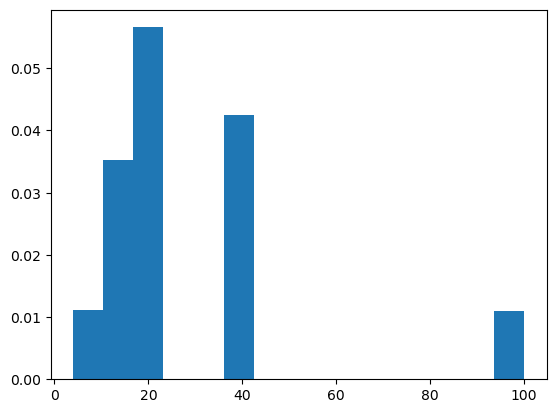

In [107]:
plt.hist(ML_est_names, density = True, bins = 15)
plt.show()

*Считаем ММ оценку для каждого к и смотрим их распределение:*

In [108]:
MM_est_names = []

for k in k_names:
    n_hat_names = n_vals[abs(E_all - k) == np.min(abs(E_all - k))][0]
    if n_hat_names < 100:
        MM_est_names.append(n_hat_names)
    else:
        MM_est_names.append(100)

MM_est_names = np.array(MM_est_names)

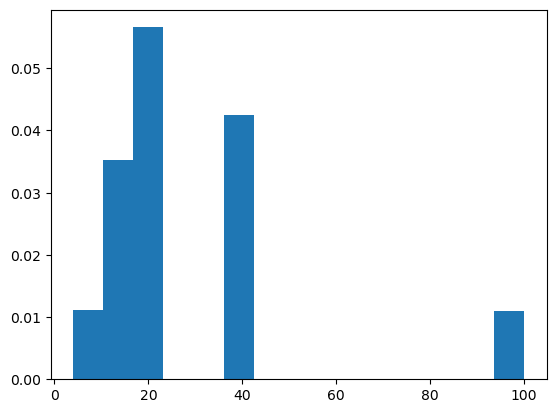

In [109]:
plt.hist(MM_est_names, density = True, bins = 15)

plt.show()

In [113]:
MM = MM_est_names
ML = ML_est_names

*Считаем дисперсию, смещение, MSE:*

In [116]:
bias_mm_names = abs(20 - np.mean(MM))
bias_ml_names = abs(20 - np.mean(ML))

mse_mm_names = np.sum((((MM) - 20)**2))/10**4
mse_ml_names = np.sum((((ML) - 20)**2))/10**4

var_mm_names = np.sum((((MM) - np.mean(MM))**2))/10**4
var_ml_names = np.sum((((ML) - np.mean(ML))**2))/10**4

In [117]:
result_names = pd.DataFrame({'Оценка': ('ML', 'MM'),'Смещение': (bias_ml_names, bias_mm_names), 'Дисперсия': (var_ml_names, var_mm_names), 'MSE': (mse_ml_names, mse_mm_names)})
result_names.set_index('Оценка')

,Смещение,Дисперсия,MSE
Оценка,,,
ML,8.5350,532.272775,605.1190
MM,8.9052,525.222213,604.5248


# Задача 3:

**Пункт А:**

In [120]:
# - реализуем доверительные интеревалы и считаем долю покрытия
def CI_mean(x,n):
    means = np.mean(x, axis=1)
    std = np.std(x, ddof = 1, axis = 1)/ np.sqrt(20)

    lower_bounds = means - 1.96 * std
    upper_bounds = means + 1.96 * std

    res_ci = np.logical_and(lower_bounds <= n, upper_bounds >= n)
    return np.mean(res_ci) 

# - реализуем наивный бутстрап
def naive_bootstrap_mean(x,n):
    l_naive = []
    for sample in tqdm.tqdm(x):
        boot_indices = np.random.choice(np.arange(20), size=(10**4, 20))
        means_boot = np.mean(sample[boot_indices], axis=1)

        quantile_l = np.percentile(means_boot, 2.5)
        quantile_r = np.percentile(means_boot, 97.5)

        res_naive = np.logical_and(quantile_l <= n, quantile_r >= n)
        l_naive.append(res_naive)
    return np.mean(l_naive)

# - реализуем т-бутстрап
def t_bootstrap_mean(x, n):
    l_t = []
    for sample in tqdm.tqdm(x):

        boot_indices = np.random.choice(np.arange(20), size=(10**4, 20))

        means_boot = np.mean(sample[boot_indices], axis=1)
        se_boot = (np.std(sample[boot_indices], axis=1, ddof = 1))/np.sqrt(20)
        mean_sample = np.mean(sample)

        quantile_l = np.percentile((means_boot - mean_sample)/se_boot, 2.5)
        quantile_r = np.percentile((means_boot - mean_sample)/se_boot, 97.5)

        res_t = np.logical_and(mean_sample - quantile_r*(np.std(sample, ddof = 1))/np.sqrt(20) <= n, n <= mean_sample - quantile_l*(np.std(sample, ddof = 1))/np.sqrt(20))
        l_t.append(res_t)
    return np.mean(l_t)    

In [122]:
np.random.seed(19)
samples = np.random.exponential(1, size=(10**4, 20))

*ДИ*

Фактическая вероятность накрытия:

In [123]:
np.random.seed(23)

CI_mean(samples,1)

0.9005

*Наивный бутстрэп*

*Фактическая вероятность накрытия:*

In [42]:
np.random.seed(19)

naive_bootstrap_mean(samples,1)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:38<00:00, 101.38it/s]


0.9026

*Бутстрэп t-статистики*

*Фактическая вероятность накрытия:*

In [64]:
np.random.seed(19)

t_bootstrap_mean(samples,1)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:00<00:00, 83.25it/s]


0.9443

**Пункт Б:**

In [125]:
t_samples = np.random.standard_t(3, size=(10**4,20))

*Ди*

*Фактическая вероятность накрытия:*

In [126]:
np.random.seed(19)

CI_mean(t_samples,0)

0.939

*Наивный бутстрап*

*Фактическая вероятность накрытия:*

In [127]:
np.random.seed(19)

naive_bootstrap_mean(t_samples,0)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:31<00:00, 109.77it/s]


0.9136

*Бутстрап t - статистики*

*Фактическая вероятность накрытия:*

In [65]:
np.random.seed(23)

t_bootstrap_mean(t_samples,0)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:53<00:00, 88.24it/s]


0.9259

**Пункт В:**

Для экспоненциального распределения лучший результат показал t - бутстрап. Потому что наивный не учитывает стандартную ошибку, а ди нужно чуть больше наблюдений для большей точности.

Для стьюдента - ДИ. Это логично, потому что при ди по сути строится t - статистика, которая при истинном распределении стьюдента и дает самую точную оценку. А t - распределению нужно меньшее кол-во наблюдений, чтобы показывать бОльшую точность.

# Задача 4:

In [158]:
sample = pd.read_csv('ОЦЕНКИ.csv', sep = ';')


In [159]:
pattern_1 = r'^[бвгджзйклмнпрстфхцчшщ]'
pattern_2 = r'^[аеёиоуыэюя]'

sample_cons = sample[sample['Фамилия'].str.contains(pattern_1, flags=re.IGNORECASE, regex=True)]
sample_vow = sample[sample['Фамилия'].str.contains(pattern_2, flags=re.IGNORECASE, regex=True)]


In [160]:
x = sample_cons['Результат']
y = sample_vow['Результат']

x = np.array(x)
y = np.array(y)

**Пункт А:**

*X - согласные, Y - гласные*

In [161]:
S, pvalue_welch = ttest_ind(x, y, equal_var=False, alternative='two-sided')

print(f'p_value = {pvalue_welch} => гипотеза не отвергается для уровня значимости 5%.')

p_value = 0.3974027153843839 => гипотеза не отвергается для уровня значимости 5%.


**Пункт Б:**

In [162]:
mean_real = np.mean(x) - np.mean(y)
se_real = np.sqrt((x.std()**2)/x.shape[0] + (y.std()**2)/y.shape[0])

In [163]:
np.random.seed(19)



boot_indices_x = np.random.choice(np.arange(283), size=(10**4, 283))
boot_indices_y = np.random.choice(np.arange(49), size=(10**4, 49))

means_bootstrap_diff = np.mean(x[boot_indices_x], axis=1) - np.mean(y[boot_indices_y], axis=1)


quantile_l_naive = np.percentile(means_bootstrap_diff, 2.5)
quantile_r_naive = np.percentile(means_bootstrap_diff, 97.5)



print(f'Накрывает ли интервал истинное значение: {np.logical_and( quantile_l_naive <= mean_real, mean_real <= quantile_r_naive)}.') 
print('Вывод: гипотеза о равенстве не отвергается.')
print(f'Рассчитаем p_value: {2*(np.min([np.mean((mean_real < means_bootstrap_diff)), np.mean(mean_real >= means_bootstrap_diff)]))} => гипотеза не отвергается для уровня значимости 5%.')

Накрывает ли интервал истинное значение: True.
Вывод: гипотеза о равенстве не отвергается.
Рассчитаем p_value: 0.9964 => гипотеза не отвергается для уровня значимости 5%.


**Пункт В:**

In [164]:
np.random.seed(19)

mean_real = np.mean(x) - np.mean(y)

boot_indices_x = np.random.choice(np.arange(283), size=(10**4, 283))
boot_indices_y = np.random.choice(np.arange(49), size=(10**4, 49))

means_bootstrap = np.mean(x[boot_indices_x], axis=1) - np.mean(y[boot_indices_y], axis=1)
se_bootstrap = np.sqrt(((np.std(x[boot_indices_x], axis=1, ddof=1))**2 /(283) 
                + np.std(y[boot_indices_y], axis=1, ddof=1))**2 /(49))



boots_sample = (means_bootstrap - mean_real) / se_bootstrap

quantile_l_t = np.percentile(boots_sample, 2.5)
quantile_r_t = np.percentile(boots_sample, 97.5)

print(f'Накрывает ли интервал истинное значение: {np.logical_and( quantile_l_t <= S, S <= quantile_r_t)}') 
print('Вывод: гипотеза о равенстве не отвергается.')
print(f'Рассчитаем p_value: {2*(np.min([np.mean((S < boots_sample)), np.mean(S >= boots_sample)]))} => гипотеза не отвергается для уровня значимости 5%.')

Накрывает ли интервал истинное значение: True
Вывод: гипотеза о равенстве не отвергается.
Рассчитаем p_value: 0.3926 => гипотеза не отвергается для уровня значимости 5%.


**Пункт Г:**

In [165]:
a1 = np.zeros_like(y)
a2 = np.ones_like(x)

a = np.hstack((a2, a1))
w = np.hstack((x, y))

In [166]:
np.random.seed(19)

deltas_list = []

for i in range(10**4):
    a_p = np.random.permutation(a)
    delta_hat = np.mean(w[a_p == 1]) - np.mean(w[a_p == 0]) 
    deltas_list.append(delta_hat)

quantile_l_permutation = np.percentile(deltas_list, 2.5) 
quantile_r_permutation = np.percentile(deltas_list, 97.5) 


deltas_list = np.array(deltas_list)

print(f'Накрывает ли интервал истинное значение: {np.logical_and(quantile_l_permutation <= mean_real, quantile_r_permutation >= mean_real)}.')
print('Вывод: гипотеза о равенстве не отвергается.')
print(f'Рассчитаем p_value: {2*(np.min([np.mean(( mean_real < deltas_list)), np.mean( mean_real >= deltas_list)]))} => гипотеза не отвергается для уровня значимости 5%.')


Накрывает ли интервал истинное значение: True.
Вывод: гипотеза о равенстве не отвергается.
Рассчитаем p_value: 0.3738 => гипотеза не отвергается для уровня значимости 5%.


# Задача 5:


In [167]:
med_more_cons = sample[(sample['Фамилия'].str.contains(pattern_1, flags=re.IGNORECASE, regex=True)) & 
                       (sample['Результат'] > np.median(sample['Результат']))].count()

med_less_cons = sample[(sample['Фамилия'].str.contains(pattern_1, flags=re.IGNORECASE, regex=True)) & 
                       (sample['Результат'] <= np.median(sample['Результат']))].count()

med_more_vow = sample[(sample['Фамилия'].str.contains(pattern_2, flags=re.IGNORECASE, regex=True)) & 
                       (sample['Результат'] > np.median(sample['Результат']))].count()

med_less_vow = sample[(sample['Фамилия'].str.contains(pattern_2, flags=re.IGNORECASE, regex=True)) & 
                       (sample['Результат'] <= np.median(sample['Результат']))].count()
                       

In [168]:
matrix = np.array([[med_more_cons[0], med_less_cons[0]], [med_more_vow[0], med_less_vow[0]]])

index_labels = ['Consonant', 'Vowel']
column_labels = ['> Median', '<= Median']

contingency_matrix = pd.DataFrame(matrix, index=index_labels, columns=column_labels)

contingency_matrix

,> Median,<= Median
Consonant,145,138
Vowel,21,28


Для начала будем оценивать именно логарифм отношения, чтобы разбить его на разность логарифмов и не мучиться с многомерным дельта-методом. 
$$ ln({\hat{OR}}) = ln({\hat{Odds}_B}) - ln({\hat{Odds}_A}) $$ 


$$ ln({\hat{Odds}}) = ln(\frac{\hat{p}}{1-\hat{p}}) \approx ln(\frac{p}{1-p}) + \frac{1}{p(1-p)} \cdot (\hat{p} - p) $$

$$ \Rightarrow ln({\hat{Odds}}) \sim^{asy} N(ln(\frac{p}{1-p}); \frac{1}{p(1-p)n}) $$

$$ \Rightarrow ln({\hat{Odds}_B}) - ln({\hat{Odds}_A})  \sim^{asy} N(ln(\frac{p}{1-p}) - ln(\frac{q}{1-q}); \frac{1}{p(1-p)n} + \frac{1}{q(1-q)n}) $$

*Если подставить оценки вместо истинных параметров и преобразовать выражение дисперсии, получим:*

$$ ln(\hat{Odds}_B) - ln(\hat{Odds}_A)  \sim^{asy} N(ln(\frac{\hat{p}}{1-\hat{p}}) - ln(\frac{\hat{q}}{1-\hat{q}}); \frac{1}{a} + \frac{1}{b} + \frac{1}{c} + \frac{1}{d}) $$

*Тут a,b,c,d - числа из таблицы сопряженности. А SE здесь просто корень из выражения на месте асимптотической дисперсии.*

Пользуя полученными выражениями и асимптотическим распределением строим интервал для логарифма отношения шансов, а затем при помощи потенцирования получаем интервал для отношения шансов.

**Пункт А:**

In [169]:
rv = norm(loc = 0, scale = 1)

In [170]:
stat_hat_odds = np.log(21/28) - np.log(145/138) 
se_hat_odds = np.sqrt(1/145+1/138+1/21+1/28)

stat_observed_standard = (stat_hat_odds - 0)/(se_hat_odds) 

In [171]:
print(f' CI: {np.exp([stat_hat_odds - 1.96*se_hat_odds, stat_hat_odds + 1.96*se_hat_odds])} \n p_value: {2*np.min([rv.cdf(stat_observed_standard), 1-rv.cdf(stat_observed_standard)])}')

 CI: [0.38709024 1.31623208] 
 p_value: 0.280180274566451


**Пункт Б:**

$$ ln({\hat{RR}}) = ln({\hat{Risk}_B}) - ln({\hat{Risk}_A}) $$ 

$$ ln({\hat{Risk}}) = ln(\hat{p}) \approx ln(p) + \frac{1}{p}\cdot(\hat{p} - p) $$

$$ \Rightarrow ln({\hat{Risk}}) \sim^{asy} N(ln(p); \frac{1-p}{p\cdot n}) $$

*Для разности логарифмов проделываем трюк, аналогичный тому, что был в пункте а, и после подстановки оценок вмесмто истинного параметра получаем:*

$$ ln(\hat{R}_B) - ln(\hat{R}_A)  \sim^{asy} N(ln(\hat{p}) - ln(\hat{q}); \frac{1}{b} - \frac{1}{b+a} + \frac{1}{c} - \frac{1}{c+d}) $$

*Тут b и c это количество людей, которые набрали больше медианы в каждой из групп. a и d - кол-во людей, набравших меньше.*

*Теперь так же найдем интервал для логарифма, а затем возьмём от границ экспоненту.*

In [172]:
stat_hat_risk = np.log(21/49) - np.log(145/283)
se_hat_risk = np.sqrt(1/145 - 1/283 + 1/21 - 1/49)

stat_observed_risk_standard = (stat_hat_risk - 0)/(se_hat_risk)

print(f' CI: {np.exp([stat_hat_risk - 1.96*se_hat_risk, stat_hat_risk + 1.96*se_hat_risk])} ')
print(f' p-value: {2*np.min([rv.cdf(stat_observed_risk_standard), 1-rv.cdf(stat_observed_risk_standard)])}')

 CI: [0.59374922 1.17836612] 
 p-value: 0.3070947928050546


**Пункт В:**

*Бутстрэп наивный, для этого будем заново генерировать людей из двух групп и сравнивать их с медианой, а затем строить таблицу сопряженности.*

In [174]:
np.random.seed(19)

odds = []

p_pass_cons = contingency_matrix.iloc[0][0] / (contingency_matrix.iloc[0][0] + contingency_matrix.iloc[0][1])
p_pass_vow = contingency_matrix.iloc[1][0] / (contingency_matrix.iloc[1][0] + contingency_matrix.iloc[1][1])

OR_obs = (p_pass_cons / (1 - p_pass_cons)) / (p_pass_vow / (1 - p_pass_vow))

for _ in range(10**4):
    
    x_cons = np.random.choice(sample_cons['Результат'], size=sample_cons.shape[0])
    y_vow = np.random.choice(sample_vow['Результат'], size=sample_vow.shape[0])

    med_more_cons_b = np.sum(x_cons > np.median(sample['Результат']))
    med_less_cons_b = np.sum(x_cons <= np.median(sample['Результат']))
    med_more_vow_b = np.sum(y_vow > np.median(sample['Результат']))
    med_less_vow_b = np.sum(y_vow <= np.median(sample['Результат']))

    matrix = np.array([[med_more_cons_b, med_less_cons_b], [med_more_vow_b, med_less_vow_b]])

    p_a = matrix[0][0] / np.sum(matrix[0])
    p_b = matrix[1][0] / np.sum(matrix[1])

    odd = (p_a / (1 - p_a)) / (p_b / (1 - p_b))
    odds.append(odd)

odds = np.array(odds)

ql = np.percentile(odds, 2.5)
qr = np.percentile(odds, 97.5)

print(f'Накрывает ли построенный интервал наблюдаемое значение: {np.logical_and(OR_obs <= qr, OR_obs >= ql)}')
print('Вывод: гипотеза не отвергается.')
print(f'Рассчитаем p-value: {2*(np.min([np.mean(( OR_obs < odds)), np.mean( OR_obs >= odds)]))} => гипотеза не отвергается.')


Накрывает ли построенный интервал наблюдаемое значение: True
Вывод: гипотеза не отвергается.
Рассчитаем p-value: 0.9898 => гипотеза не отвергается.


# Задача 6:

**Пункт А:**

Если матожидание от с.в. это с.в., то это условное матожидание.
$$ E[Y_i|F_i] = \beta \cdot F_i $$
Отсюда, проматожидав RHS и LHS, имеем:
$$ E[Y_i] = \beta \cdot E[F_i] $$
$$\Rightarrow \hat{\beta} = \frac{\overline{Y}}{\overline{F}} $$
Т.к. оценки для матожиданий методом моентов это средние по выборкам.

In [175]:
sample_6 = sample.copy()
sample_6['Фамилия'] = sample_6['Фамилия'].apply(len)

In [176]:
sample_6

,Фамилия,Результат
0,9,16
1,9,0
2,6,19
3,7,26
4,8,21
...,...,...
327,8,19
328,2,0
329,6,0
330,10,0


In [177]:
betas = sample_6['Результат'].mean()/sample_6['Фамилия'].mean()

In [178]:
betas

2.0613026819923372

**Пункт Б:**

Сдесь генерим перестановочный тест в предположении $H_0$ и нулевой корреляции между величинами с разными индексами.

In [179]:
x_len = sample_6['Фамилия']
y_res = sample_6['Результат']
corr_obs = np.corrcoef(x_len, y_res)[0][1]

In [180]:
np.corrcoef(x_len, y_res)[0][1]

0.025328052669147675

In [181]:
np.random.seed(19)

corrs_dist = []

for _ in range(10**4):
    x_ = np.random.permutation(x_len)
    corr_hat = np.corrcoef(x_, y_res)[0][1]
    corrs_dist.append(corr_hat)

corrs_dist = np.array(corrs_dist)

q_corr_r = np.quantile(corrs_dist, 0.975)
q_corr_l = np.quantile(corrs_dist, 0.025)

print(f'Накрывает ли интервал истинное значение, предполагаемое в H_0: {np.logical_and(0 <= q_corr_r, 0 >= q_corr_l)}.')
print(f'Рассчитаем p-value: {2*(np.min([np.mean(( corr_obs < corrs_dist)), np.mean( corr_obs >= corrs_dist)]))} => гипотеза не отвергается при уровне значимости 5%.')


Накрывает ли интервал истинное значение, предполагаемое в H_0: True.
Рассчитаем p-value: 0.652 => гипотеза не отвергается при уровне значимости 5%.


# Задача 7:

Ссылка на чат с GPT:
https://chat.openai.com/share/00ee1d18-d882-4988-926b-b883dc497dc2

# Задача 8:

Источники мудрости:

Blitzstein, 'Introduction to probability'

Williams, 'Weighing the odds'

Лекции С.В. Шапошникова для ФКН: https://youtube.com/playlist?list=PLlcCrvAVGbWp6KqskxCANT3Qod2Kcuwnx

Семинары Фила по матстату: https://youtube.com/playlist?list=PLNKXA-74YGLjDOtDSZEFoy1yP-3AfiHUC

3 Blue 1 Brown: https://youtube.com/@3blue1brown

    